Ghazaleh Zehtab
HW5, Q1

In [161]:
import jenkspy

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plot_utils
import seaborn as sns
import statistics
from sklearn import tree, metrics, preprocessing
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier, export_graphviz


## a

In [162]:
df= pd.read_csv("Flower.csv")
df

,X1,X2,Class
0,1.204442,3.576114,0
1,0.158710,-1.482171,0
2,0.095247,-1.279955,0
3,0.349178,-2.064380,0
4,0.694150,2.889109,0
...,...,...,...
395,0.450368,2.408121,1
396,0.037573,0.891601,1
397,0.213641,1.732016,1
398,0.324387,-2.116325,1


## b 

In [163]:
df=df.replace('MISS',np.nan)
df=df.replace('missing',np.nan)
df=df.replace('NULL',np.nan)
df=df.replace("''",np.nan)
df=df.replace("?",np.nan)
df.X1 = df.X1.fillna(df.X1.mean())
df.X2 = df.X2.fillna(df.X2.mean())
x = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled,index=df.index, columns=df.columns)
df = df.astype({"Class": int})
df

,X1,X2,Class
0,0.653353,0.942829,0
1,0.527210,0.316243,0
2,0.519555,0.341292,0
3,0.550186,0.244122,0
4,0.591799,0.857727,0
...,...,...,...
395,0.562392,0.798146,1
396,0.512598,0.610289,1
397,0.533837,0.714394,1
398,0.547195,0.237688,1


<AxesSubplot:>

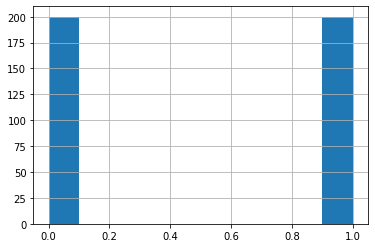

In [164]:
df['Class'].hist()

## c


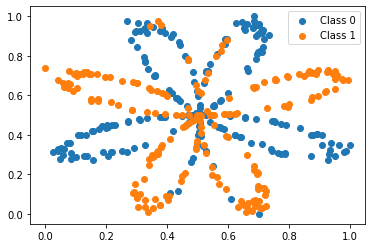

In [165]:
plt.scatter(df[df.Class == 0].X1, df[df.Class == 0].X2, label = 'Class 0')
plt.scatter(df[df.Class == 1].X1, df[df.Class == 1].X2, label = 'Class 1')
plt.legend()

## d

In [166]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]
x

,X1,X2
0,0.653353,0.942829
1,0.527210,0.316243
2,0.519555,0.341292
3,0.550186,0.244122
4,0.591799,0.857727
...,...,...
395,0.562392,0.798146
396,0.512598,0.610289
397,0.533837,0.714394
398,0.547195,0.237688


## e

<AxesSubplot:>

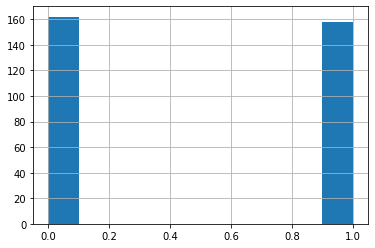

In [167]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)
y_train.hist()

<AxesSubplot:>

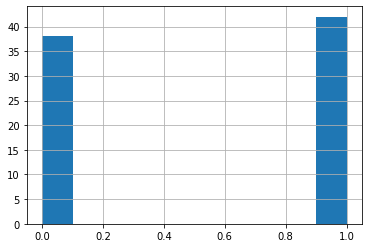

In [168]:
y_test.hist()

## f
MLPClassifier

In [169]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)
mlp.fit(x_train, y_train.values.ravel())
Y_predicted=mlp.predict(x_test)

## g

In [170]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, Y_predicted))

[[31  7]
 [26 16]]


In [171]:
print(classification_report(y_test, Y_predicted))

              precision    recall  f1-score   support

           0       0.54      0.82      0.65        38
           1       0.70      0.38      0.49        42

    accuracy                           0.59        80
   macro avg       0.62      0.60      0.57        80
weighted avg       0.62      0.59      0.57        80



## h

def plot_prediction(model, X, y):
    x_min, x_max = X.T.iloc[0, :].min() - 1, X.T.iloc[0, :].max() + 1
    y_min, y_max = X.T.iloc[1, :].min() - 1, X.T.iloc[1, :].max() + 1
    h = 0.01

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('X1')
    plt.xlabel('X2')
    plt.scatter(X.T.iloc[0, :], X.T.iloc[1, :], c=(y.iloc[:]), cmap=plt.cm.Spectral)

plot_prediction(lambda x: mlp.predict(x), pd.DataFrame(x_train), pd.DataFrame(y_train))

## i

Accuracy =  58.75


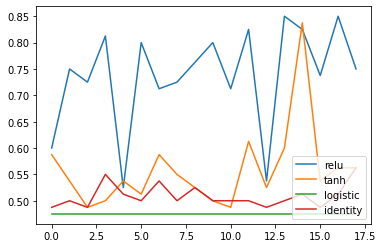

In [172]:
accuracy = accuracy_score(y_test,Y_predicted)*100
print("Accuracy = ", accuracy)
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000,activation='relu')
mlp.fit(x_train, y_train.values.ravel())

auc_test = []
auc_test_tanh = []
auc_test_logistic=[]
auc_test_identity=[]
i_list_iter=[]
for i in range(200,2000,100):
    i_list_iter.append(i)
    mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=i,activation='relu')
    mlp.fit(x_train, y_train.values.ravel())
    Y_predicted=mlp.predict(x_test)
    auc_test.append(accuracy_score(y_test,Y_predicted))
for i in range(200,2000,100):
    mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=i,activation='tanh')
    mlp.fit(x_train, y_train.values.ravel())
    Y_predicted=mlp.predict(x_test)
    auc_test_tanh.append(accuracy_score(y_test,Y_predicted))
for i in range(200,2000,100):
    mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=i,activation='logistic')
    mlp.fit(x_train, y_train.values.ravel())
    Y_predicted=mlp.predict(x_test)
    auc_test_logistic.append(accuracy_score(y_test,Y_predicted))
for i in range(200,2000,100):
    mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=i,activation='identity')
    mlp.fit(x_train, y_train.values.ravel())
    Y_predicted=mlp.predict(x_test)
    auc_test_identity.append(accuracy_score(y_test,Y_predicted))
x = np.arange(len(i_list_iter))
plt.plot(x, np.array(auc_test))
plt.plot(x, np.array(auc_test_tanh))
plt.plot(x, np.array(auc_test_logistic))
plt.plot(x, np.array(auc_test_identity))
plt.legend(['relu', 'tanh','logistic','identity'], loc='lower right')
plt.show()

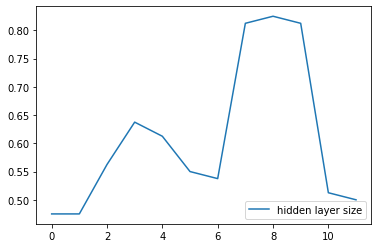

In [173]:
 
auc_layer=[]
i_list=[]
for i in range(3,15):
    i_list.append(i)
    mlp = MLPClassifier(hidden_layer_sizes=(i, i, i), max_iter=1000,activation='tanh')
    mlp.fit(x_train, y_train.values.ravel())
    Y_predicted=mlp.predict(x_test)
    auc_layer.append(accuracy_score(y_test,Y_predicted))
x = np.arange(len(i_list))
plt.plot(x, np.array(auc_layer))
plt.legend(['hidden layer size'], loc='lower right')
plt.show()

### final model

In [176]:
mlp = MLPClassifier(hidden_layer_sizes=(8, 8, 8), max_iter=1100,activation='relu')
mlp.fit(x_train, y_train.values.ravel())
Y_predicted=mlp.predict(x_test)
accuracy_score(y_test,Y_predicted)*100

62.5

In [177]:
print(classification_report(y_test, Y_predicted))

              precision    recall  f1-score   support

           0       0.59      0.68      0.63        38
           1       0.67      0.57      0.62        42

    accuracy                           0.62        80
   macro avg       0.63      0.63      0.62        80
weighted avg       0.63      0.62      0.62        80

